# Problem statement : To predict on titanic data . who is survived .

# 1. Import Libraries

In [483]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# 2.Data Collection

In [484]:
df = pd.read_csv('E:/ML_Datasets/titanic_data.csv')

In [485]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,fair,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# shape

In [486]:
df.shape

(891, 12)

# check missing values

In [487]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
fair             0
Cabin          687
Embarked         2
dtype: int64

## Age has 177 missing values
## Cabin has 687 missing values
## Embarked has missing values

## Histogram

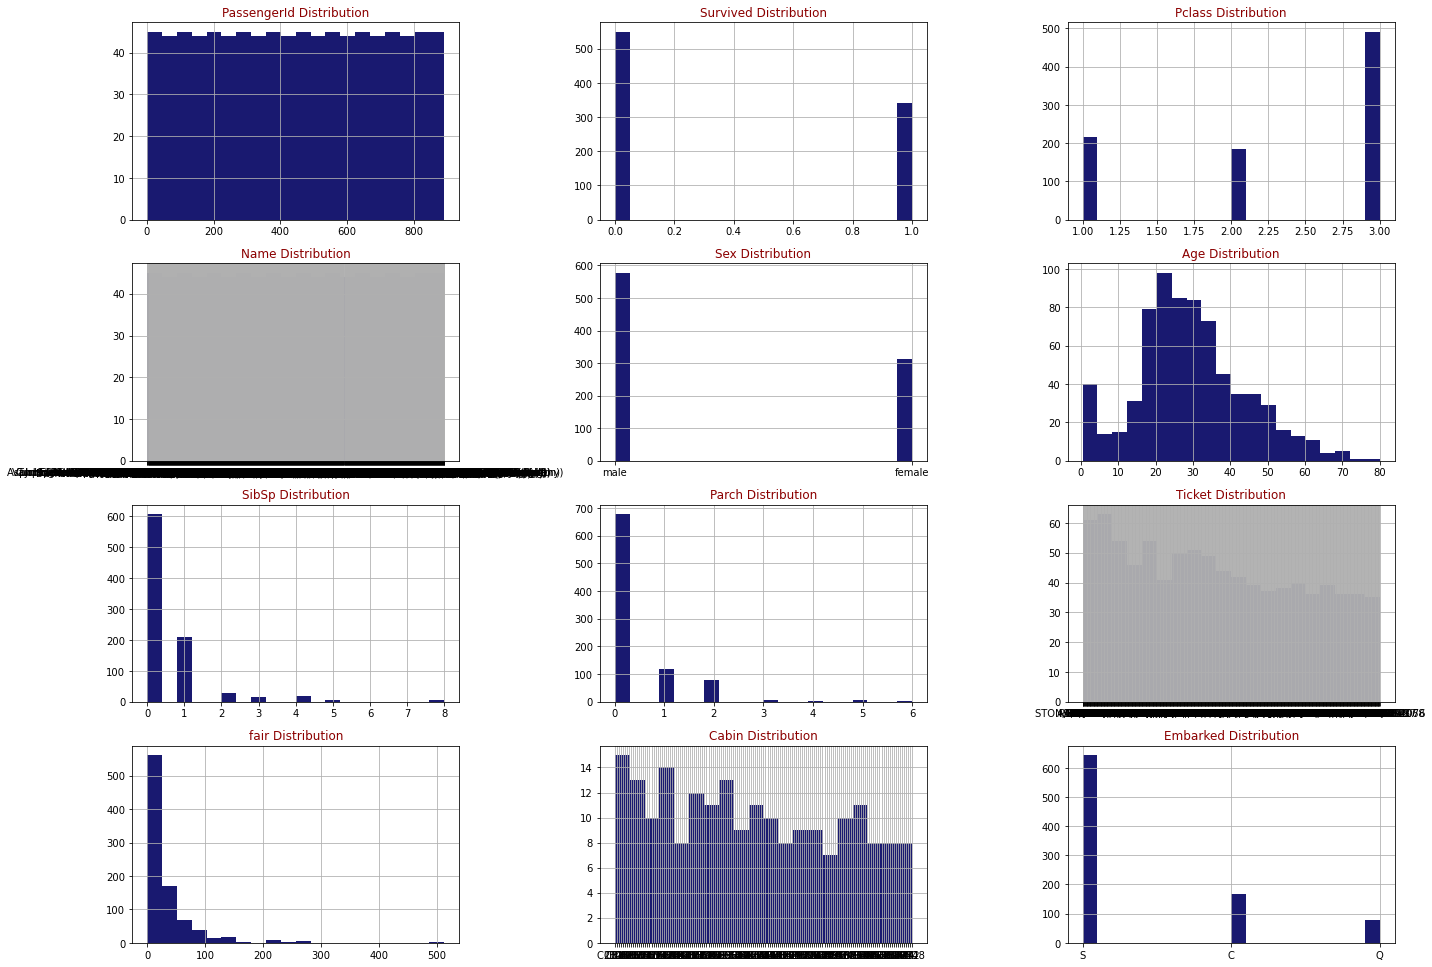

In [488]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

# Pair plot : To check relation of input variable to output variable

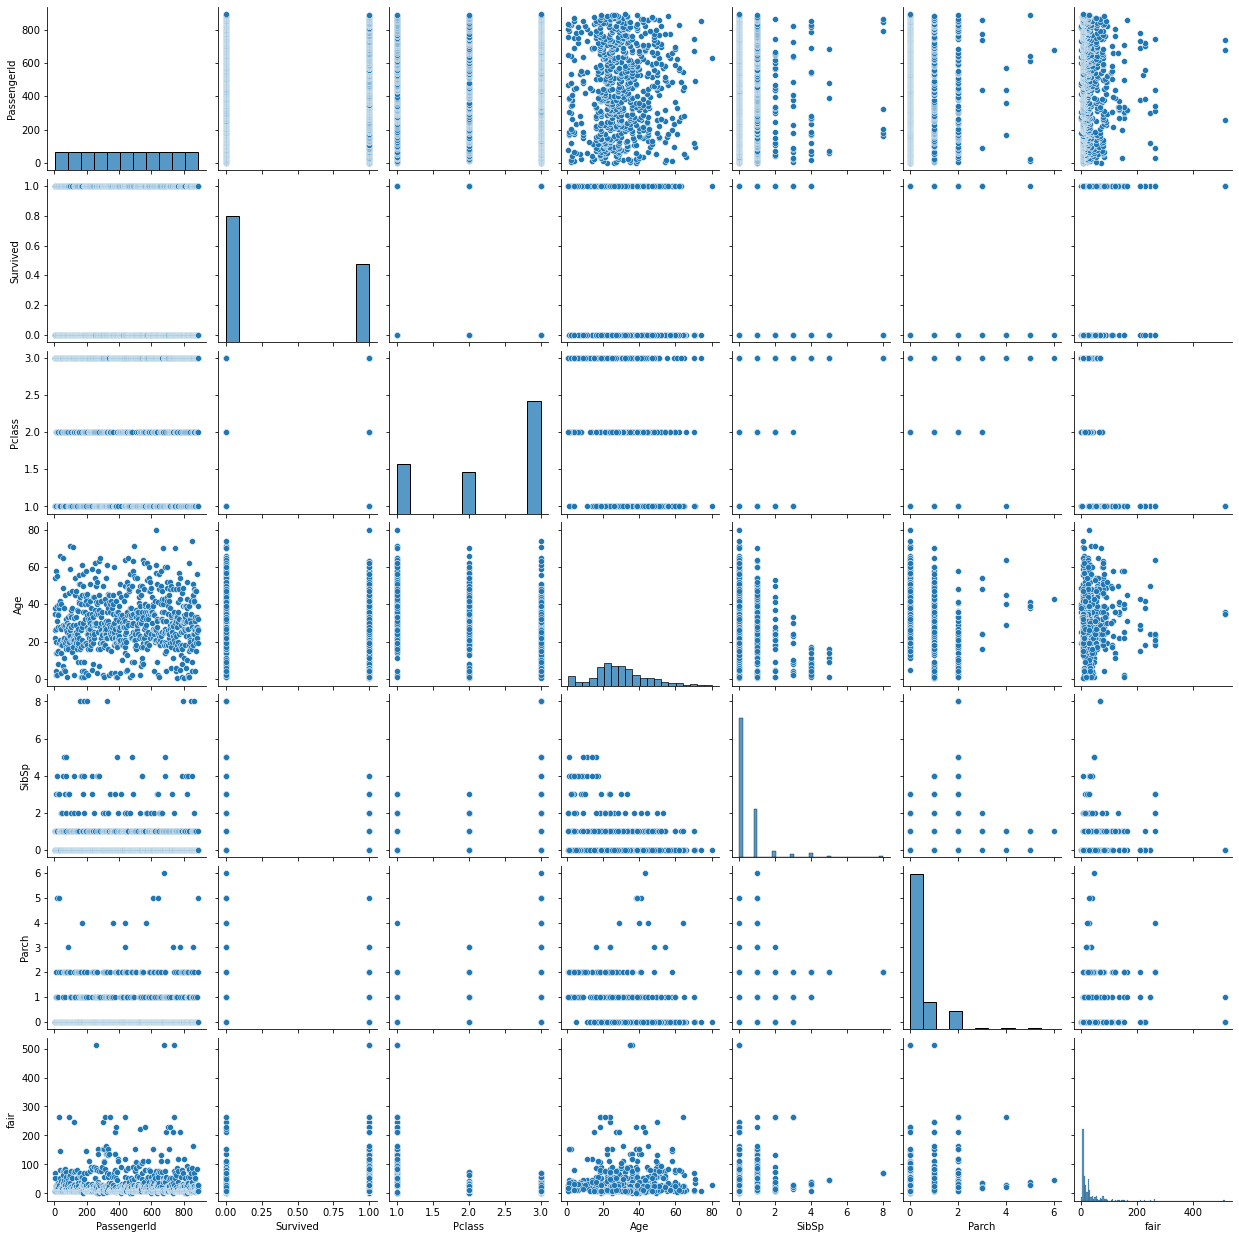

In [489]:
sns.pairplot(df)

# Box Plot : check ouliers / anomely detection.

<AxesSubplot:>

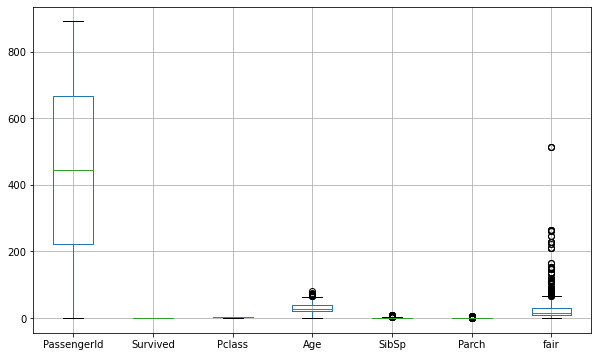

In [490]:
plt.figure(figsize =(10,6) )
df.boxplot()

## check missing values rowwise and percentage of  data missing

In [491]:
count = 0
for i in df.isnull().sum(axis = 1):
    if i > 0 :
        count =count + 1
        
print('count :', count)
print('Percentage :',(count/len(df)) * 100 )

count : 708
Percentage : 79.46127946127946


## missing values per column and percenatge of missing data  by column wise 

In [492]:
print('Total number of rows are missing:', df.isnull().sum())
print('Total percentage of data missing in dataframe:',(df.isnull().sum()/len(df))*100)

Total number of rows are missing: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
fair             0
Cabin          687
Embarked         2
dtype: int64
Total percentage of data missing in dataframe: PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
fair            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


# Percentage of data missing in Age column

In [493]:
print('missing values columns are : ', df['Age'].isnull().sum() )
print('Percentage of data missing are :',(df['Age'].isnull().sum()/len(df.index)) * 100)

missing values columns are :  177
Percentage of data missing are : 19.865319865319865


# Percentage of data missing in Cabin column

In [494]:
print('No . of data missing in Cabin are : ', df['Cabin'].isnull().sum())
print('Total percentage of data missing in Cabin are :', (df['Cabin'].isnull().sum()/len(df))*100)

No . of data missing in Cabin are :  687
Total percentage of data missing in Cabin are : 77.10437710437711


# Percentage of data missing in Embarked column

In [495]:
print('No. of data missing in Embarked are :', df['Embarked'].isnull().sum())
print('Total percentage of data are missing :', (df['Embarked'].isnull().sum()/len(df))* 100)

No. of data missing in Embarked are : 2
Total percentage of data are missing : 0.22446689113355783


## mean value of age column for filling missing value in age column

 #### we can fill null values by mean values . Generally when dataset is large that time it we are remove the missing values but here dataset is small so we replace missing values by mean value 

### axis=0 argument calculates the column wise mean of the dataframe 

In [496]:
mean_age = df['Age'].mean(axis  = 0)

In [497]:
mean_age

29.69911764705882

In [498]:
median_age  = df['Age'].median(skipna = True)

In [499]:
median_age 

28.0

In [500]:
df['Age'].fillna(mean_age , inplace = True)

In [501]:
df['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

## mean of Embarked column for filling missing values in Embarked column

In [502]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

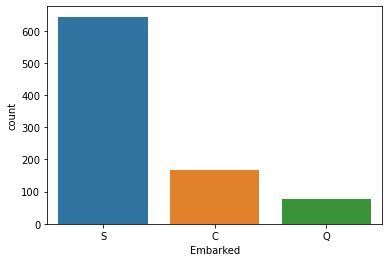

In [503]:
sns.countplot(df['Embarked'])

#### Here we can not calculate mean because of data is in string format so unable to calculate mean . but we can easily calculate most occurance Embarked element .  so we can replace the null value by that element.

In [504]:
df["Embarked"].fillna(df['Embarked'].value_counts().idxmax(), inplace=True)

In [505]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

### Here cabin columns has large amount of missing value so  we can not replace by it mean and there is string data only . that column has 77.77 % data missing so it is not proper / valid way to replace by maean . so we can removew the cabin column from dayaset

In [506]:
df.drop(['Cabin'],axis =1 , inplace = True)

In [507]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,fair,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


## check nullvalues fill or not

In [508]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
fair           0
Embarked       0
dtype: int64

## Here no any single value in dataset

In [509]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,fair,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


## Remove the columns

In [510]:
df.drop(['Name','Sex','Ticket'] , axis = 1 , inplace = True)

In [511]:
df.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,fair,Embarked
0,1,0,3,22.0,1,0,7.2500,S
1,2,1,1,38.0,1,0,71.2833,C


## check data is balanced or not

In [512]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## balanced data plot

C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

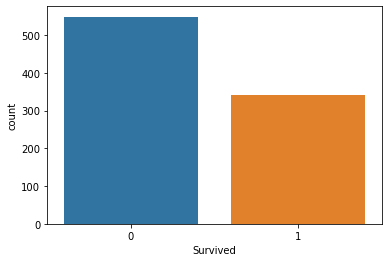

In [513]:
sns.countplot(df['Survived'])

## Oversampling

In [514]:
from sklearn.utils import resample

df_minority = df[df['Survived']==1]
df_majority = df[df['Survived']==0]

df_minority_upsample = resample(df_minority , replace = True , n_samples = 549 , random_state = 42)


df_upsample = pd.concat([df_majority , df_minority_upsample])

In [515]:
df_upsample.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,fair,Embarked
0,1,0,3,22.0,1,0,7.25,S
4,5,0,3,35.0,0,0,8.05,S


## Now data is balanced

In [516]:
df_upsample['Survived'].value_counts()

0    549
1    549
Name: Survived, dtype: int64

## Balanced plot

C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

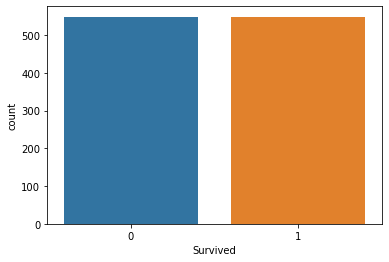

In [517]:
sns.countplot(df_upsample['Survived'])

## Import RandomForestClassifier model for feature importance score

In [518]:
from sklearn.ensemble import RandomForestClassifier

In [519]:
from sklearn.preprocessing import LabelEncoder

In [520]:
label = LabelEncoder()
df['Embarked'] = label.fit_transform(df['Embarked'])

In [521]:
df.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,fair,Embarked
0,1,0,3,22.0,1,0,7.2500,2
1,2,1,1,38.0,1,0,71.2833,0


In [522]:
x = df.loc[: , ['PassengerId','Pclass', 'Age', 'SibSp','Parch','fair','Embarked']]
y = df.loc[:,['Survived']]

In [523]:
x.head(2)

,PassengerId,Pclass,Age,SibSp,Parch,fair,Embarked
0,1,3,22.0,1,0,7.2500,2
1,2,1,38.0,1,0,71.2833,0


In [524]:
y.head(2)

,Survived
0,0
1,1


In [525]:
model = RandomForestClassifier(n_estimators = 100 , random_state = 42)

In [526]:
x_train , x_test , y_train ,y_test = train_test_split(x, y, test_size = 0.2 , random_state = 42)

In [527]:
model.fit(x_train , y_train)

C:\Users\Pritam\AppData\Local\Temp/ipykernel_7756/1964293123.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train , y_train)


RandomForestClassifier(random_state=42)

In [528]:
model.feature_importances_ 

array([0.29738973, 0.07598755, 0.23010699, 0.05166531, 0.04056083,
       0.26698744, 0.03730216])

## Feature importance score

In [529]:
pd.DataFrame(model.feature_importances_ , x.columns , columns =(['feature_importance_score']))

,feature_importance_score
PassengerId,0.297390
Pclass,0.075988
Age,0.230107
SibSp,0.051665
Parch,0.040561
fair,0.266987
Embarked,0.037302


<BarContainer object of 7 artists>

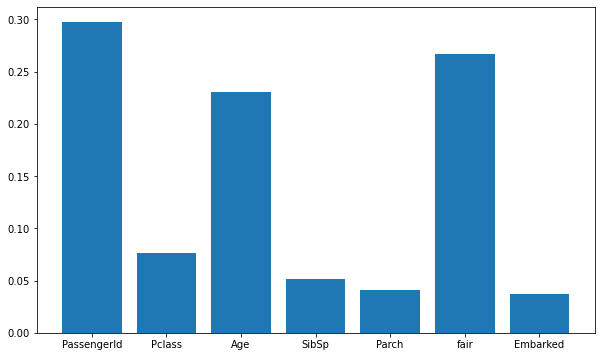

In [530]:
plt.figure(figsize = (10, 6))
plt.bar(x.columns , model.feature_importances_)

In [531]:
#X = df_upsample.loc[:,['PassengerId','Age','fair']]
X = df.loc[: , ['PassengerId','Pclass', 'Age', 'SibSp','Parch','fair','Embarked']]
Y = df.loc[:,['Survived']]

In [532]:
X.head(2)

,PassengerId,Pclass,Age,SibSp,Parch,fair,Embarked
0,1,3,22.0,1,0,7.2500,2
1,2,1,38.0,1,0,71.2833,0


In [533]:
Y.head(2)

,Survived
0,0
1,1


In [534]:
X_train , X_test , Y_train ,Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 42)

# import Logitic regression_model

In [535]:
from sklearn.linear_model import LogisticRegression

In [536]:
model1 = LogisticRegression()

In [537]:
model1.fit(X_train ,Y_train)

C:\Users\Pritam\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Pritam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## model training accuracy

In [538]:
model1.score(X_train , Y_train)

0.7191011235955056

## testing accuracy

In [539]:
model1.score(X_test , Y_test)

0.7262569832402235

## prediction output

In [540]:
Y_pred = model1.predict(X_test)

In [541]:
import sklearn
sklearn.metrics.accuracy_score(Y_test , Y_pred)

0.7262569832402235

In [542]:
# Evaluation_matrix or Cost Function or Performance_matrix

In [543]:
from sklearn.metrics import log_loss , confusion_matrix , classification_report

In [544]:
log_loss = (log_loss(Y_test , Y_pred ))

In [545]:
log_loss 

9.454797982806456

In [546]:
confusion_matrix = confusion_matrix(Y_test , Y_pred)

In [547]:
confusion_matrix

array([[94, 11],
       [38, 36]], dtype=int64)

In [548]:
cm = pd.DataFrame(confusion_matrix , columns=['predicted:0','predicted:1'],index = ['actual : 0' , 'actual : 1'])

<AxesSubplot:>

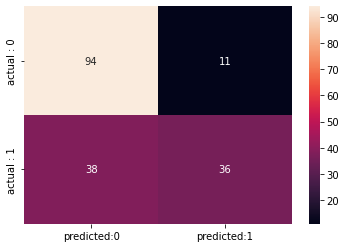

In [549]:
sns.heatmap(cm,
    
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=True,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
)

## Here in this confusion matrix , 94 + 36 = 130 are correct predictions and 11+38 = 49 are incorrect predictions

## True Positive = 94
## False Negative = 11
## False Positive = 38
## True Negative = 36

In [550]:
TP = confusion_matrix[1,1]
FN = confusion_matrix[1,0]
FP = confusion_matrix[0,1]
TN = confusion_matrix[0,0]

In [551]:
sensitivity = TP/(TP+FN)

In [552]:
sensitivity

0.4864864864864865

In [553]:
specifity = TN/(TN+FP)

In [554]:
specifity

0.8952380952380953

In [555]:
accuracy = sklearn.metrics.accuracy_score(Y_test ,Y_pred)

In [556]:
accuracy

0.7262569832402235

In [557]:
missclassification = 1 - accuracy

In [558]:
missclassification

0.2737430167597765

In [559]:
positive_likelihood_ratio = sensitivity/(1-specifity)

In [560]:
positive_likelihood_ratio

4.643734643734645

In [561]:
Negative_likelihood_ratio = (1-sensitivity)/(specifity)

In [562]:
Negative_likelihood_ratio

0.573605520414031

In [563]:
True_positive_value = (TP/(TP+FP))

In [564]:
True_positive_value

0.7659574468085106

In [565]:
True_Negative_value = TN/(TN+FN)

In [566]:
True_Negative_value

0.7121212121212122

In [567]:
print('accuracy :',(TP+TN)/(TP+TN+FP+FN))

accuracy : 0.7262569832402235


In [568]:
print(classification_report(Y_test ,Y_pred))

              precision    recall  f1-score   support

           0       0.71      0.90      0.79       105
           1       0.77      0.49      0.60        74

    accuracy                           0.73       179
   macro avg       0.74      0.69      0.69       179
weighted avg       0.73      0.73      0.71       179



In [569]:
Y_pred_prob = model1.predict_proba(X_test)

In [570]:
Y_pred_prob_df = pd.DataFrame(Y_pred_prob , columns =['Survived_probability_score: 0','Survived_probability_score:1'])

In [571]:
Y_pred_prob_df

,Survived_probability_score: 0,Survived_probability_score:1
0,0.668146,0.331854
1,0.620567,0.379433
2,0.728705,0.271295
3,0.346974,0.653026
4,0.613031,0.386969
...,...,...
174,0.711066,0.288934
175,0.676643,0.323357
176,0.627925,0.372075
177,0.511873,0.488127


In [572]:
pd.DataFrame(Y_pred)

,0
0,0
1,0
2,0
3,1
4,0
...,...
174,0
175,0
176,0
177,0
